In [22]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
address="kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x"
API_KEY="kdp_722ad9825ff1144878629812d69609b0e3084323ec6d4299ffd4cbd4b23a0f2b"
url = f"https://api.kas.fyi/v1/addresses/{address}/transactions?limit=100"
headers = {"x-api-key": API_KEY}

response = requests.get(url, headers=headers)
data = response.json()
print(data)

{'transactions': [{'transactionId': '2d6d3c9cf9b3791c08382edc827f539c3129831dfcb08a11062b94ea1336c0f5', 'blockTime': '1765028558897', 'subnetworkId': '0000000000000000000000000000000000000000', 'hash': '58df05295175b1505b2cb4c54080b21a65c88460def98fe572b6b9b58a80eacd', 'mass': '1624', 'isAccepted': True, 'acceptingBlockHash': 'f3cfe9387850bec078bd93ee7d780bc659d23b8110a93dabc8cfef581164ed86', 'confirmations': 8492810, 'outputs': [{'transactionId': '2d6d3c9cf9b3791c08382edc827f539c3129831dfcb08a11062b94ea1336c0f5', 'index': 0, 'amount': '7499950000', 'scriptPublicKey': '0000204012759604c3a7834bac13858aa40c66fc2cba88b5419acda2571532d9bcdb17ac', 'scriptPublicKeyAddress': 'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2', 'scriptPublicKeyType': 'PubKey'}], 'blockHashes': ['1e2899e673beebc8a4e53863c256016bce91bd0d27b0ca9016226fb637baff67', 'a7690bf324d3987512ad531af6270a900ada78ead48a780053f51e307cdbe5ce', 'edf7379cb678a0b405e1bc2b357c2e35fd77f6573a6c5201ce47163f30dbd4a5

In [2]:
print(len(data["transactions"]))

20


In [12]:
print(data["transactions"][0]["inputs"][0])

{'transactionId': '2d6d3c9cf9b3791c08382edc827f539c3129831dfcb08a11062b94ea1336c0f5', 'index': 0, 'signatureScript': '41c9547cf79e148ca66ebf9b5e6c96cdff47934daafc20b394d80f7f28be8a040291a148d4da611d2cad0f64ef8edae790c112a93564afdde6d945b4d95021ad7e01', 'sigOpCount': 1, 'previousOutput': {'transactionId': '95e2e7e60f885694cf7e7e0093ed00a8aea785b26da5eb630b96f5ca4ff3d42c', 'index': 0, 'amount': '7500000000', 'scriptPublicKey': '00002021021cca82dd6d1bcb1edd4d6ce3726cee7fcf184061b19e3976600bd10b6645ac', 'scriptPublicKeyAddress': 'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'scriptPublicKeyType': 'PubKey'}}


In [25]:
G=nx.DiGraph()

address1="kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x"

def make_graph(G,address,cercle,limit):
    url = f"https://api.kas.fyi/v1/addresses/{address}/transactions?limit={limit}"
    headers = {"x-api-key": API_KEY}

    response = requests.get(url, headers=headers)
    data = response.json()
    transac={}
    for transactions in data["transactions"]:
        for input in transactions["inputs"]:
            incomeAddress=input["previousOutput"]["scriptPublicKeyAddress"]
            if incomeAddress not in transac:
                transac[incomeAddress]={}
            for output in transactions["outputs"]:
                outcomeAddress=output["scriptPublicKeyAddress"]
                if outcomeAddress not in transac[incomeAddress]:
                    transac[incomeAddress][outcomeAddress]=1
                else:
                    transac[incomeAddress][outcomeAddress]+=1

    addresses=[]
    for income in transac:
        if income not in addresses:
            addresses.append(income)
        for outcome in transac[income]:
            G.add_edge(income[:15],outcome[:15],weight=transac[income][outcome])
            if outcome not in addresses:
                addresses.append(outcome)

    print(addresses)
    return G,addresses

G,outcomes=make_graph(G,address=address1,cercle=1,limit=20)

['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph']


In [28]:
print(type(outcomes))

<class 'list'>


In [24]:
G=nx.DiGraph()

address1="kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x"

def make_graph(G,address,cercle,limit):
    url = f"https://api.kas.fyi/v1/addresses/{address}/transactions?limit={limit}"
    headers = {"x-api-key": API_KEY}

    response = requests.get(url, headers=headers)
    data = response.json()
    transac={}
    for transactions in data["transactions"]:
        for input in transactions["inputs"]:
            incomeAddress=input["previousOutput"]["scriptPublicKeyAddress"]
            if incomeAddress not in transac:
                transac[incomeAddress]={}
            for output in transactions["outputs"]:
                outcomeAddress=output["scriptPublicKeyAddress"]
                if outcomeAddress not in transac[incomeAddress]:
                    transac[incomeAddress][outcomeAddress]=1
                else:
                    transac[incomeAddress][outcomeAddress]+=1

    addresses=[]
    for income in transac:
        if income not in addresses:
            addresses.append(income)
        for outcome in transac[income]:
            G.add_edge(income[:15],outcome[:15],weight=transac[income][outcome])
            if outcome not in addresses:
                addresses.append(outcome)

    return G,outcomes

G,outcomes=make_graph(G,address=address1,cercle=1,limit)
for outcome in outcomes:
    G,_=make_graph(G,outcome,cercle=2)

colors=[]
colors.append("blue")
for i in range(len(outcomes)):
    colors.append("red")
for i in range(len(G)-len(outcomes)-1):
    colors.append("green")

plt.figure(figsize=(18, 14))

pos = nx.spring_layout(
    G,
    k=3,
    iterations=300
)

nx.draw(
    G, pos,
    with_labels=True,
    node_color=colors,
    node_size=1800,
    font_size=8,
    arrowsize=15
)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Kaspa Graph")
plt.show()


SyntaxError: positional argument follows keyword argument (1829469847.py, line 35)

3 ['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph']
4 ['kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2', 'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph']


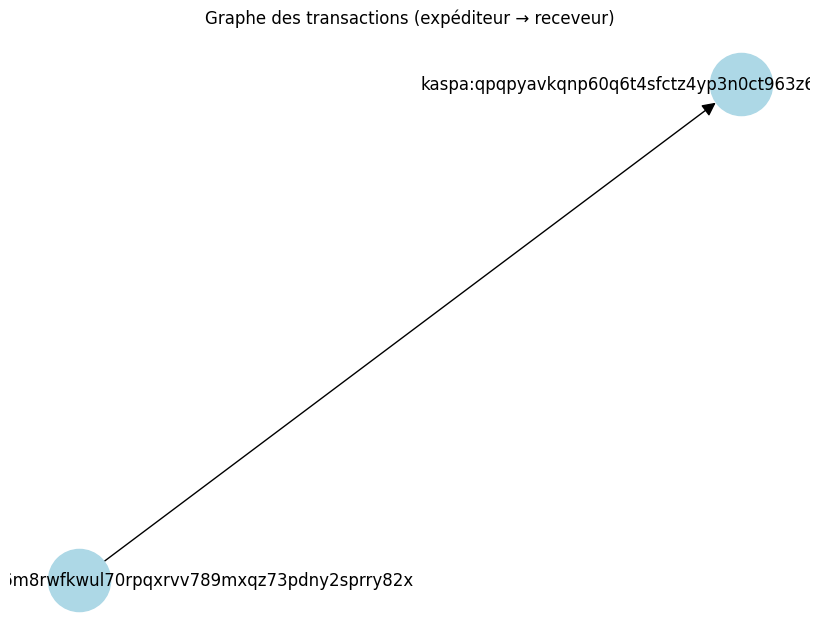

In [ ]:
inputs=[]
outputs=[]
G=nx.DiGraph()

for transactions in data["transactions"]:
    for input in transactions["inputs"]:
        incomeAddress=input["previousOutput"]["scriptPublicKeyAddress"]
        if incomeAddress not in inputs:
            inputs.append(incomeAddress)
    
    for output in transactions["outputs"]:
        outcomeAddress=output["scriptPublicKeyAddress"]
        if outcomeAddress not in outputs:
            outputs.append(outcomeAddress)
print(len(inputs),inputs)
print(len(outputs),outputs)

G=nx.DiGraph()
G.add_edge(inputs[0],outputs[0])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="lightblue",
    arrowsize=20,
    font_size=12
)

plt.title("Graphe des transactions (expéditeur → receveur)")
plt.show()


In [3]:
contacts={}
transacs_key=[]
dig_amount=4
nb_transacs=100

for transactions in data["transactions"][:nb_transacs]:
    oukey,outs,ins=[],[],[]
    
    outputs=transactions["outputs"]
    for output in outputs:
        key_out=output["scriptPublicKeyAddress"]
        outs.append(key_out)

    inputs=transactions["inputs"]
    for input in inputs:
        key_in=input["previousOutput"]["scriptPublicKeyAddress"]
        amount=int(input["previousOutput"]["amount"][:dig_amount])
        ins.append([key_in,float(amount/1000)])
    transacs_key.append([ins,outs])
    
for i in range(len(data["transactions"][:nb_transacs])):
    print(f"Transaction : {i}\nInputs: {transacs_key[i][0]}\nOutputs: {transacs_key[i][1]}")

Transaction : 0
Inputs: [['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 1.8]]
Outputs: ['kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2']
Transaction : 1
Inputs: [['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 8.999], ['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 1.02]]
Outputs: ['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl']
Transaction : 2
Inputs: [['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 8.0]]
Outputs: ['kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2']
Transaction : 3
Inputs: [['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 1.7]]
Outputs: ['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl']
Transaction : 4
Inputs: [['kaspa:qqssy8x2

In [4]:
print(transacs_key[1])

[[['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 8.999], ['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 1.02]], ['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl']]


kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  1.8
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  8.999
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  8.999
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  1.02
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  1.02
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  8.0
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  1.7
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  1.7
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  1.2
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  1.45
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  1.45
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  5.0
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  4.95
kaspa:qyph30xd6t4xnp and kaspa:qqssy8x2stwk6x amount:  6.5
kaspa:qyph30xd6t4xnp and kaspa:qyph30xd6t4xnp amount:  6.5
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  5.0
kaspa:qyph30xd6t4xnp and kaspa:qqssy8x2stwk6x a

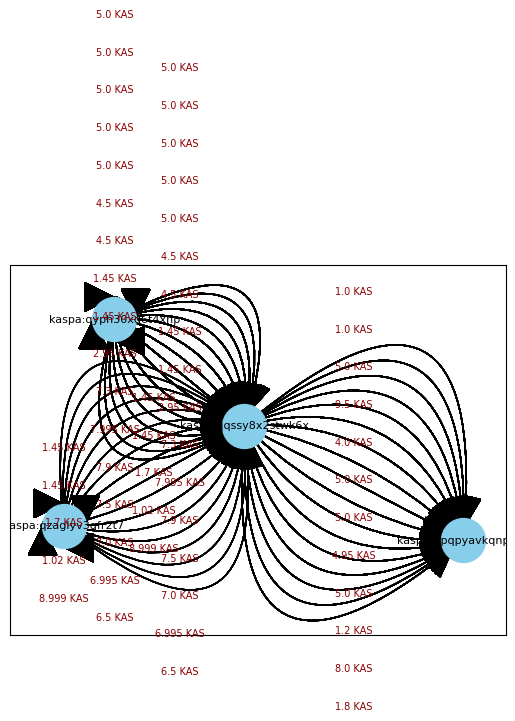

In [ ]:


name_size=20

allKey=[]
G = nx.MultiDiGraph()
for transac in transacs_key:
    for in_key,amount in transac[0]:
        allKey.append(in_key[:name_size])
    for out_key in transac[1]:
        allKey.append(out_key[:name_size])
    allKey=list(set(allKey))
    G.add_nodes_from(allKey)
    
    
    for in_key,amount in transac[0]:
        for out_key in transac[1]:
            print(in_key[:name_size],"and",out_key[:name_size],"amount: ",amount)
            G.add_edge(in_key[:name_size],out_key[:name_size],amount=amount)
        
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=8)
for i, (u, v, k, data) in enumerate(G.edges(keys=True, data=True)):
    rad = 0.15 * (k - len(G[u][v]) // 2)
    nx.draw_networkx_edges(
        G, pos,
        connectionstyle=f'arc3,rad={rad}', 
        arrows=True,                       
        arrowstyle='-|>',                  
        arrowsize=50,                      
        edge_color='black'
    )
    x_mid = (pos[u][0] + pos[v][0]) / 2
    y_mid = (pos[u][1] + pos[v][1]) / 2
    plt.text(x_mid, y_mid + rad, f"{data['amount']} KAS", fontsize=7, color="darkred", ha="center")

plt.show()